In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv');
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Assessing Data

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [188]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [189]:
df.shape

(110527, 14)

In [190]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

# Cleaning Data

In [191]:
df.duplicated().sum()

0

In [192]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [193]:
# change the type of AppointmentDay to datetime type
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [194]:
# change the type of ScheduledDay to datetime type
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

# Building a fuction to plot bars 

In [195]:
def barat(df_list,label,xlabel,legend,title):
    """Displays a bar plot 
    Arg:
        df_list:list consists of lists [[no-value,yes-value],[no-value,yes-value],...]
        label: list of strings to replace the x-axis ticks
        xlabel: a string to be printed to x label and the title
        legend: a list of strings to be in the legend
    Returns:
        a bar plot of the df_list
    """
    plt.figure(figsize=(10,10))
    plt.bar([x for x in range(len(label))],[x[0] for x in df_list],.35,alpha=.7,color='b',label=f'{legend[0]}')
    plt.bar([x+.35 for x in range(len(label))],[x[1] for x in df_list],.35,alpha=.7,color='r',label=f'{legend[1]}')
    plt.title(f'Impact of {xlabel} on {title} ')
    plt.xticks([x+.175 for x in range(len(label))],label)
    plt.xlabel(f'{xlabel}');
    plt.ylabel('No of patients');
    plt.grid();
    plt.legend();
                                                

# Buildung a function to plot precentage bar

In [196]:
def precentage_bar(df_list,label,xlabel,legend,title):
    """Displays a precentage bar plot 
    Arg:
        df_list:list consists of lists [[no-value,yes-value],[no-value,yes-value],...]
        label: list of strings to replace the x-axis ticks
        xlabel: a string to be printed to x label and the title
        legend: a list of strings to be in the legend
    Returns:
        a bar plot of the df_list
    """
    precentage=[]
    # divides each list by the sum and multiply it with 100 to get the precentage
    for d in df_list:
        precentage.append([x*100/sum(d) for x in d])
    plt.figure(figsize=(10,10))
    plt.bar([x for x in range(len(label))],[x[0] for x in precentage ],.35,alpha=.7,label=f'{legend[0]}',color='b')
    plt.bar([x+.35 for x in range(len(label))],[x[1] for x in precentage],.35,alpha=.7,color='r',label=f'{legend[1]}')
    plt.title(f'The precentage of {title} according to {xlabel}');
    plt.xlabel(f'{xlabel}');
    plt.ylabel('Precentage %');
    plt.xticks([x+.175 for x in range(len(label))],label)
    plt.grid();
    plt.legend();

# Building fuction for age scatter plots

In [197]:
def scatter_plot(dict1,dict2,title):
    """Displays a scatter plot
    Args:
        dict1: a dictionary which the have keys will be plotted on the x axis and values on y axis
        dict2: another dictionary which the have keys will be plotted on the x axis and values on y axis 
                and plotted on the same figure
        title: a string which holds the title of the figure
    """
    age1_key=[]
    age1_value=[]
    age2_key=[]
    age2_value=[]
    # to extract the values in the key which is tuple like (value,no) or (value,yes)
    for key,value in dict1.items():
        age1_value.append(value)
        age1_key.append(key[0])
    for key1,value1 in dict2.items():
        age2_value.append(value1)
        age2_key.append(key1[0])
    plt.figure(figsize=(10,10))
    plt.scatter(age1_key,age1_value,label='No',color='b')
    plt.scatter(age2_key,age2_value,label='Yes',color='r')
    plt.grid();
    plt.legend();
    plt.xlabel('Age');
    plt.ylabel('Number of patients');
    plt.title(f'The impact of age on {title}');

# Factors Possibly affect No-show

#### hint:


## [1] Scholarship

In [198]:
df.groupby(['Scholarship','No-show'])['No-show'].count()

Scholarship  No-show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: No-show, dtype: int64

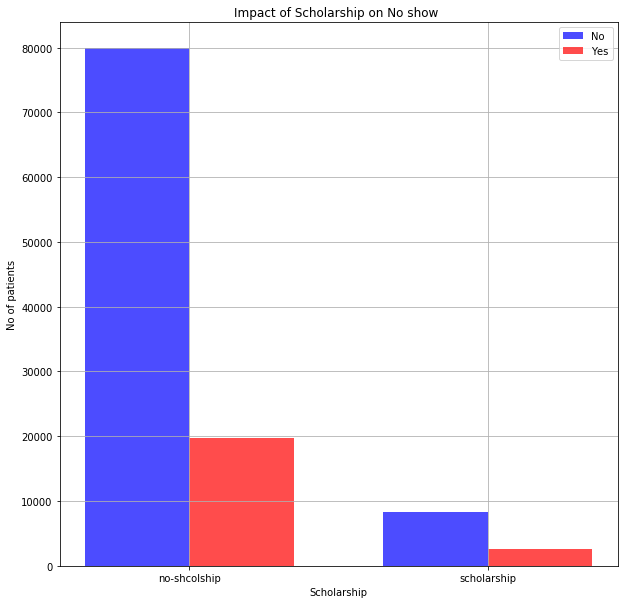

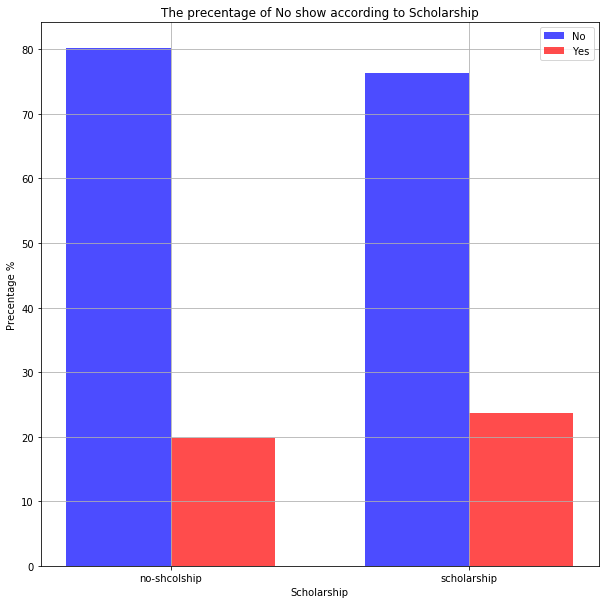

In [199]:
sh=df.groupby(['Scholarship','No-show'])['No-show'].count()
scholar=[[sh[0][0],sh[0][1]],[sh[1][0],sh[1][1]]]
legend=['No','Yes']
barat(scholar,['no-shcolship','scholarship'],'Scholarship',legend,'No show')
precentage_bar(scholar,['no-shcolship','scholarship'],'Scholarship',legend,'No show')

## [2] SMS Received

In [200]:
df.groupby(['SMS_received','No-show'])['No-show'].count()

SMS_received  No-show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: No-show, dtype: int64

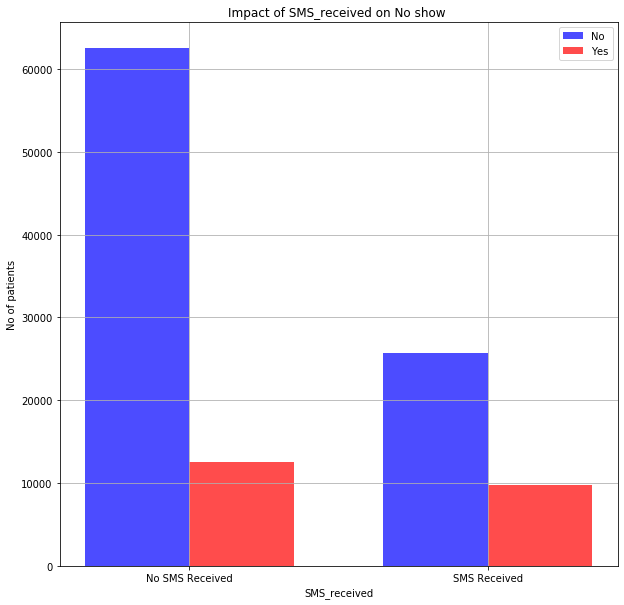

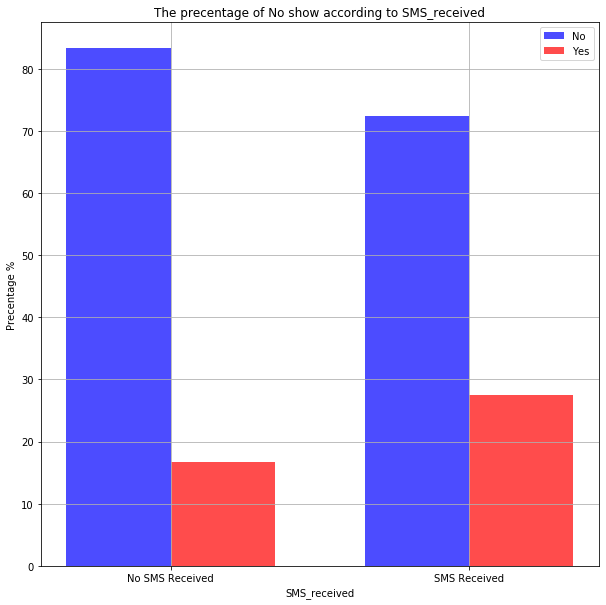

In [201]:
sms=df.groupby(['SMS_received','No-show'])['No-show'].count()
sms_list=[[sms[0][0],sms[0][1]],[sms[1][0],sms[1][1]]]
barat(sms_list,['No SMS Received','SMS Received'],'SMS_received',legend,'No show')
precentage_bar(sms_list,['No SMS Received','SMS Received'],'SMS_received',legend,'No show')

## [3] Gender

In [202]:
df.groupby(['Gender','No-show'])['No-show'].count()

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

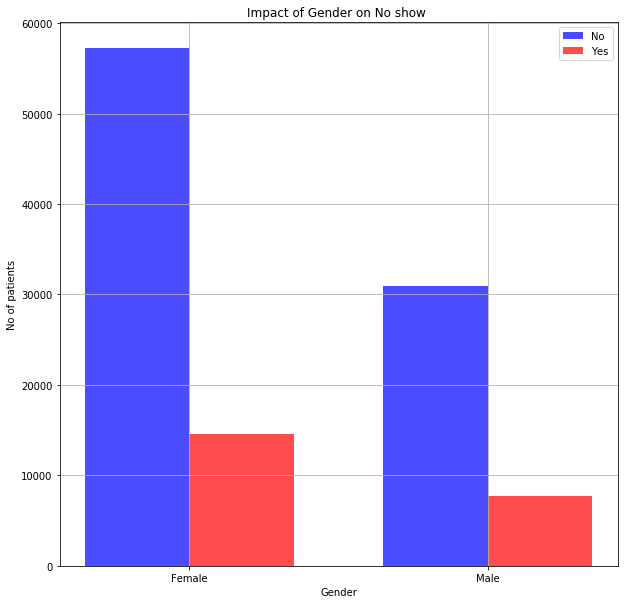

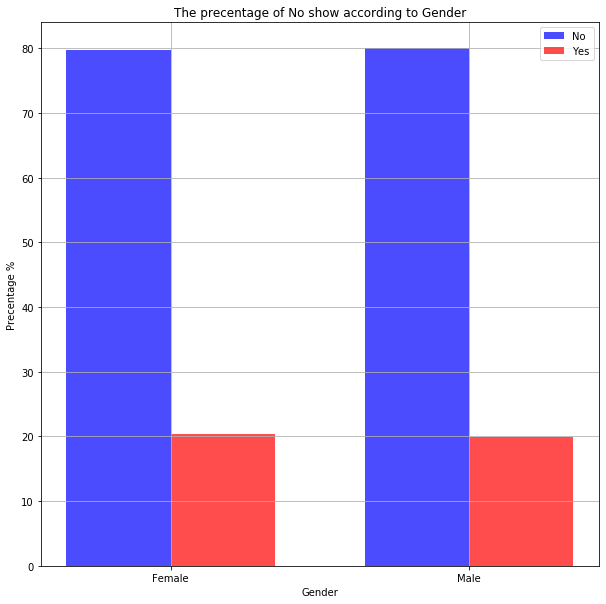

In [203]:
gender=df.groupby(['Gender','No-show'])['No-show'].count()
gender_list=[[gender[0],gender[1]],[gender[2],gender[3]]]
barat(gender_list,['Female','Male'],'Gender',legend,'No show')
precentage_bar(gender_list,['Female','Male'],'Gender',legend,'No show')

## [4] Alcoholism

In [204]:
df.groupby(['Alcoholism','No-show'])['No-show'].count()

Alcoholism  No-show
0           No         85525
            Yes        21642
1           No          2683
            Yes          677
Name: No-show, dtype: int64

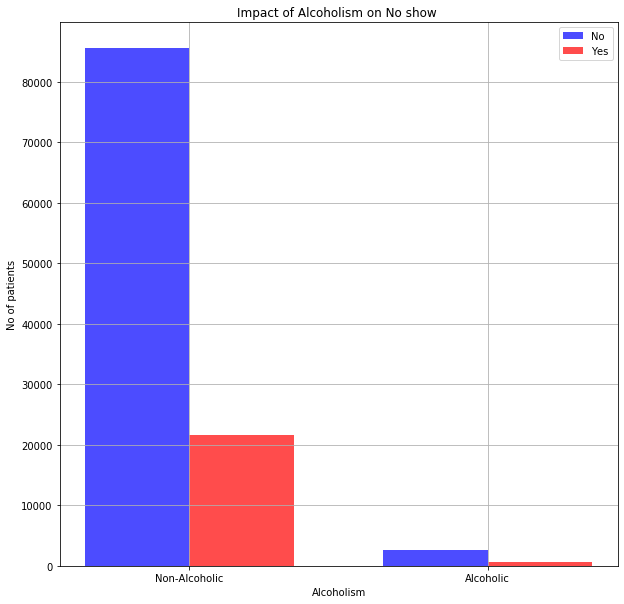

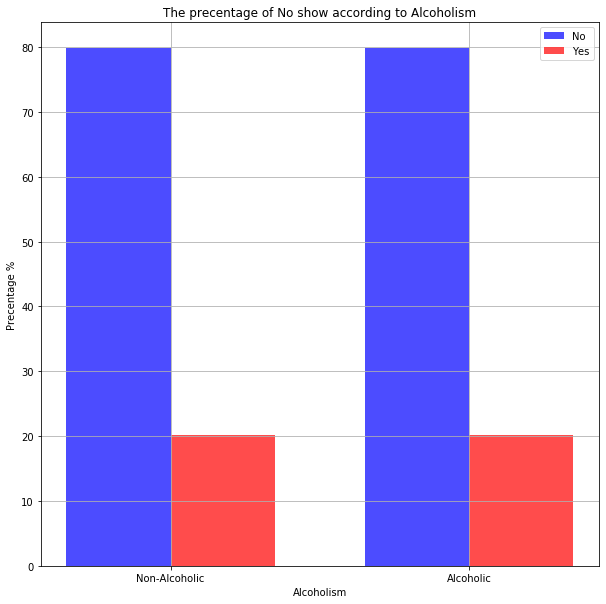

In [205]:
alcoholism=df.groupby(['Alcoholism','No-show'])['No-show'].count()
alcoholism_list=[[alcoholism[0][0],alcoholism[0][1]],[alcoholism[1][0],alcoholism[1][1]]]
barat(alcoholism_list,['Non-Alcoholic','Alcoholic'],'Alcoholism',legend,'No show')
precentage_bar(alcoholism_list,['Non-Alcoholic','Alcoholic'],'Alcoholism',legend,'No show')

## [5] Diabetes

In [206]:
df.groupby(['Diabetes','No-show'])['No-show'].count()

Diabetes  No-show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: No-show, dtype: int64

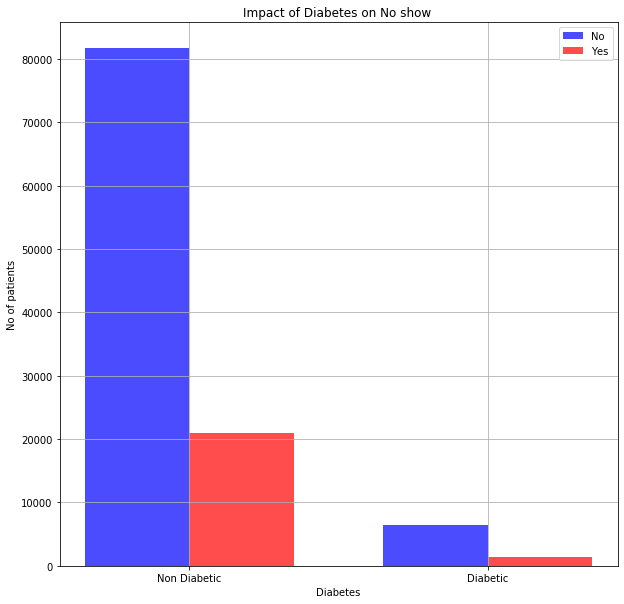

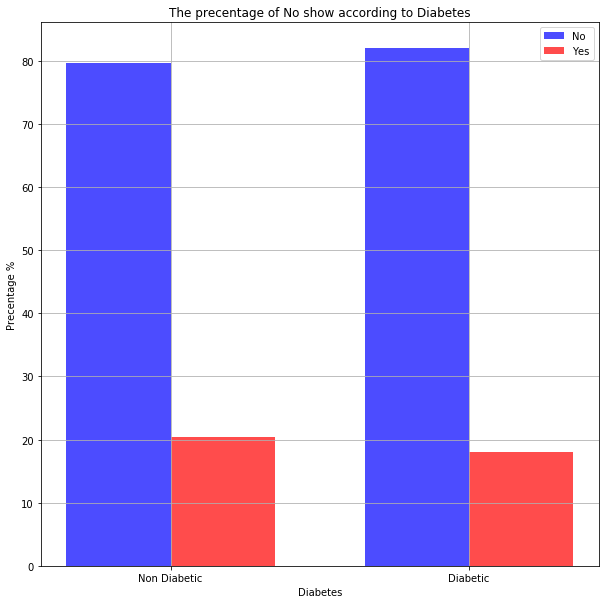

In [207]:
diabetes=df.groupby(['Diabetes','No-show'])['No-show'].count()
diabetes_list=[[diabetes[0][0],diabetes[0][1]],[diabetes[1][0],diabetes[1][1]]]
barat(diabetes_list,['Non Diabetic','Diabetic'],'Diabetes',legend,'No show')
precentage_bar(diabetes_list,['Non Diabetic','Diabetic'],'Diabetes',legend,'No show')

## [6] Hipertension

In [208]:
df.groupby(['Hipertension','No-show'])['No-show'].count()

Hipertension  No-show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: No-show, dtype: int64

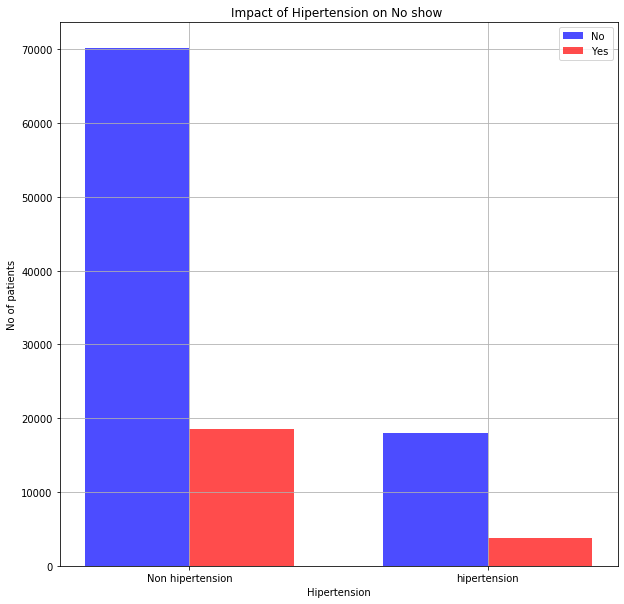

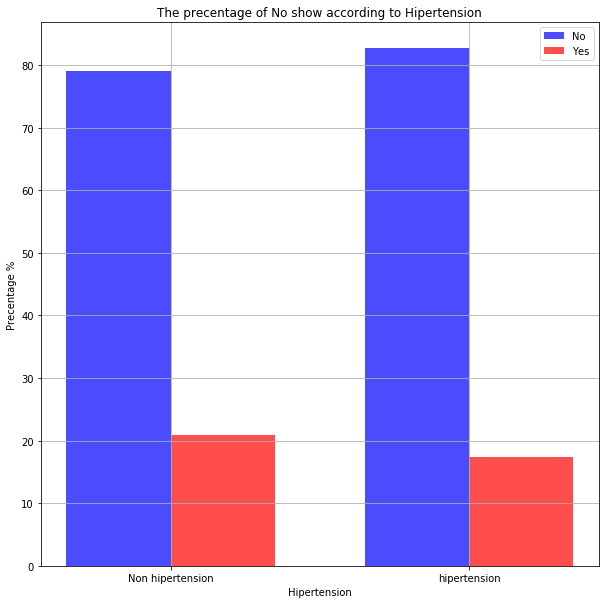

In [209]:
hipertension=df.groupby(['Hipertension','No-show'])['No-show'].count()
hipertension_list=[[hipertension[0][0],hipertension[0][1]],[hipertension[1][0],hipertension[1][1]]]
barat(hipertension_list,['Non hipertension','hipertension'],'Hipertension',legend,'No show')
precentage_bar(hipertension_list,['Non hipertension','hipertension'],'Hipertension',legend,'No show')

## [7]AppointmentDay

In [210]:
# creating a new column holds the day of the appointment
df['Day']=df['AppointmentDay'].dt.weekday_name
df.groupby(['Day','No-show'])['No-show'].count()

Day        No-show
Friday     No         14982
           Yes         4037
Monday     No         18025
           Yes         4690
Saturday   No            30
           Yes            9
Thursday   No         13909
           Yes         3338
Tuesday    No         20488
           Yes         5152
Wednesday  No         20774
           Yes         5093
Name: No-show, dtype: int64

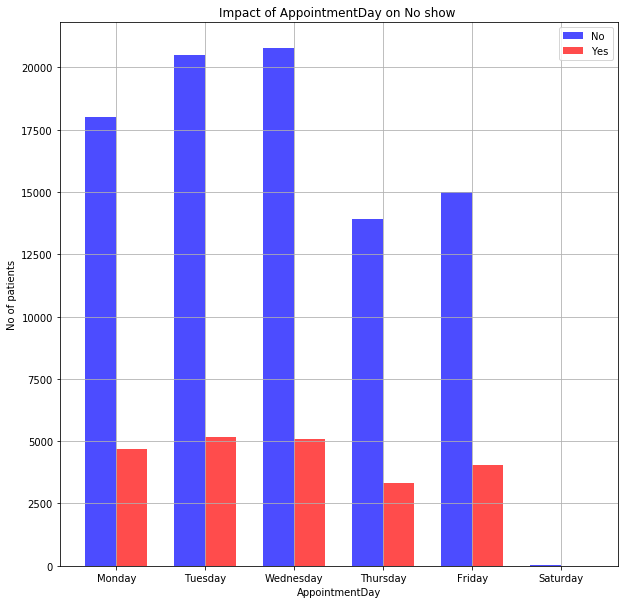

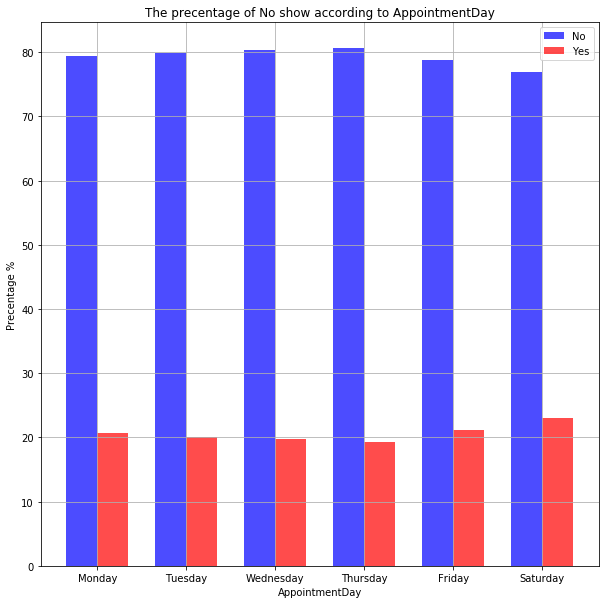

In [211]:
day=df.groupby(['Day','No-show'])['No-show'].count()
fr,mo,sa=[day[0],day[1]],[day[2],day[3]],[day[4],day[5]]
th,tu,we=[day[6],day[7]],[day[8],day[9]],[day[10],day[11]]
# arranging the days 
day_list=[mo,tu,we,th,fr,sa]
label_day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
barat(day_list,label_day,'AppointmentDay',legend,'No show')
precentage_bar(day_list,label_day,'AppointmentDay',legend,'No show')

## [8]Appointment Month

In [212]:
# creating a column holds the month of appointment
df['Month']=df.AppointmentDay.dt.month
df.groupby(['Month','No-show'])['No-show'].count()

Month  No-show
4      No          2602
       Yes          633
5      No         64037
       Yes        16804
6      No         21569
       Yes         4882
Name: No-show, dtype: int64

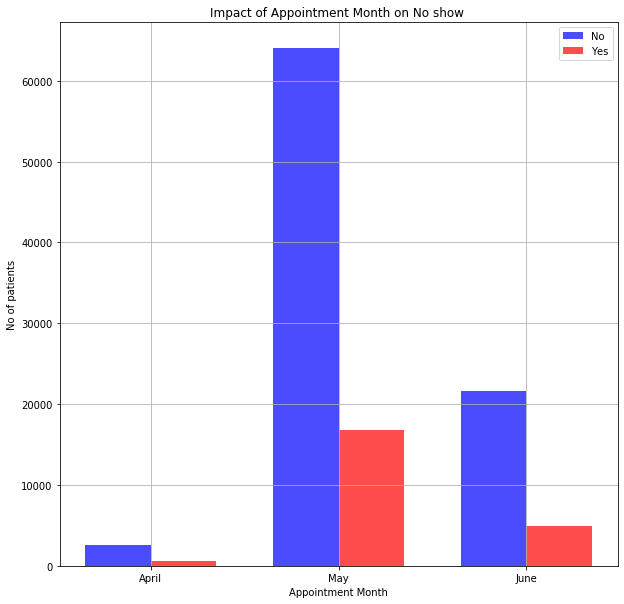

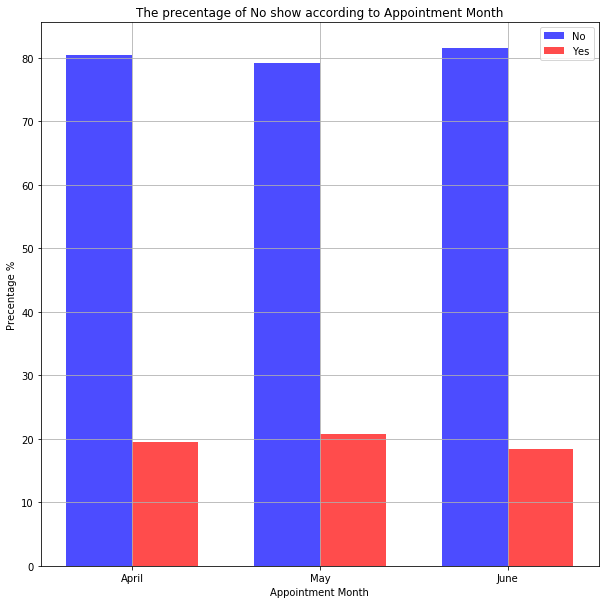

In [213]:
month=list(df.groupby(['Month','No-show'])['No-show'].count())
month_list=[[month[0],month[1]],[month[2],month[3]],[month[4],month[5]]]
label_month=['April','May','June']
barat(month_list,label_month,'Appointment Month',legend,'No show')
precentage_bar(month_list,label_month,'Appointment Month',legend,'No show')

## [9]Age

In [214]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

 There is a age -1 so I will drop it from the dataset 

In [215]:
# cleaning the typo age -1
age_ind=df.index
typo_age=age_ind[df['Age']==-1].tolist()
df.drop(labels=typo_age,axis=0,inplace=True)
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1533
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

checking that the typo removed

In [216]:
# cut the ages into five parts
bin_edges=[0,18,30,50,70,115]
bin_names=['0-18 old','18-30 old','30-50 old','50-70 old','> 70 old']
df['Age_cut']=pd.cut(df['Age'],bin_edges,bin_names)
df.groupby(['Age_cut','No-show'])['No-show'].count()

Age_cut    No-show
(0, 18]    No         19619
           Yes         5708
(18, 30]   No         12622
           Yes         4143
(30, 50]   No         23370
           Yes         6102
(50, 70]   No         22481
           Yes         4369
(70, 115]  No          7215
           Yes         1358
Name: No-show, dtype: int64

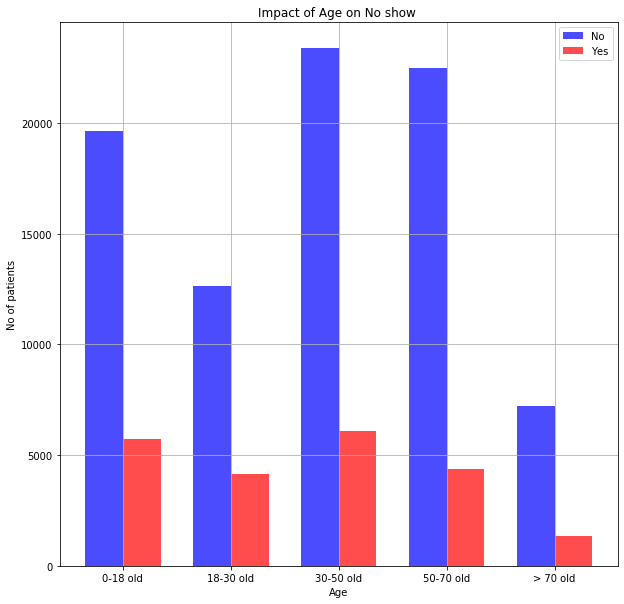

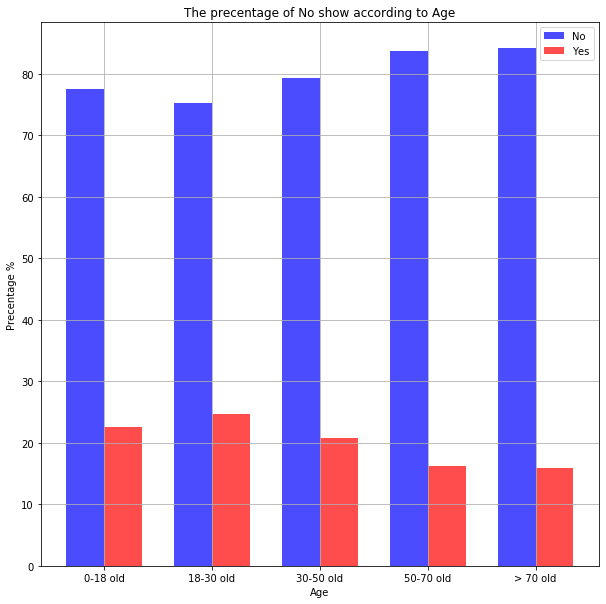

In [217]:
age_cut=list(df.groupby(['Age_cut','No-show'])['No-show'].count())
age_list=[[age_cut[i],age_cut[i+1]] for i in range(0,10,2) ]
barat(age_list,bin_names,'Age',legend,'No show')
precentage_bar(age_list,bin_names,'Age',legend,'No show')

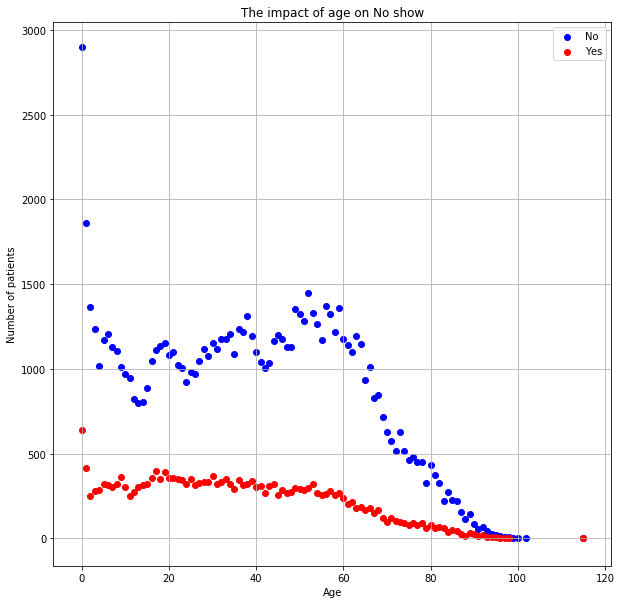

In [218]:
age1=dict(df[df['No-show']=='No'].groupby(['Age','No-show'])['No-show'].count())
age2=dict(df[df['No-show']=='Yes'].groupby(['Age','No-show'])['No-show'].count())
scatter_plot(age1,age2,'No show')

# Relation between Gender and diseases

In [219]:
# removing duplicated patients that have the same Patientid
df_copy=df.copy()

In [220]:
# number of duplicated patients 
df_copy.PatientId.duplicated().sum()

48228

In [221]:
df_copy.drop_duplicates(subset='PatientId',keep='last',inplace=True)

In [222]:
df_copy.nunique()

PatientId         62298
AppointmentID     62298
Gender                2
ScheduledDay      60429
AppointmentDay       27
Age                 103
Neighbourhood        81
Scholarship           2
Hipertension          2
Diabetes              2
Alcoholism            2
Handcap               5
SMS_received          2
No-show               2
Day                   6
Month                 3
Age_cut               5
dtype: int64

In [223]:
gender_diabetes=list(df_copy.groupby(['Gender','Diabetes'])['Gender'].count())
df_copy.groupby(['Gender','Diabetes'])['Gender'].count()

Gender  Diabetes
F       0           36993
        1            3052
M       0           20889
        1            1364
Name: Gender, dtype: int64

In [224]:
gender_hipertension=list(df_copy.groupby(['Gender','Hipertension'])['Gender'].count())
df_copy.groupby(['Gender','Hipertension'])['Gender'].count()

Gender  Hipertension
F       0               31532
        1                8513
M       0               18524
        1                3729
Name: Gender, dtype: int64

In [225]:
gender_alcoholism=list(df_copy.groupby(['Gender','Alcoholism'])['Gender'].count())
df_copy.groupby(['Gender','Alcoholism'])['Gender'].count()

Gender  Alcoholism
F       0             39477
        1               568
M       0             21315
        1               938
Name: Gender, dtype: int64

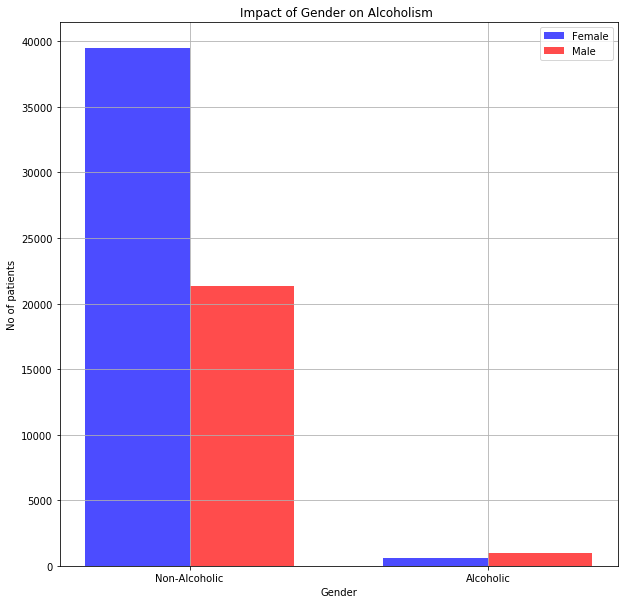

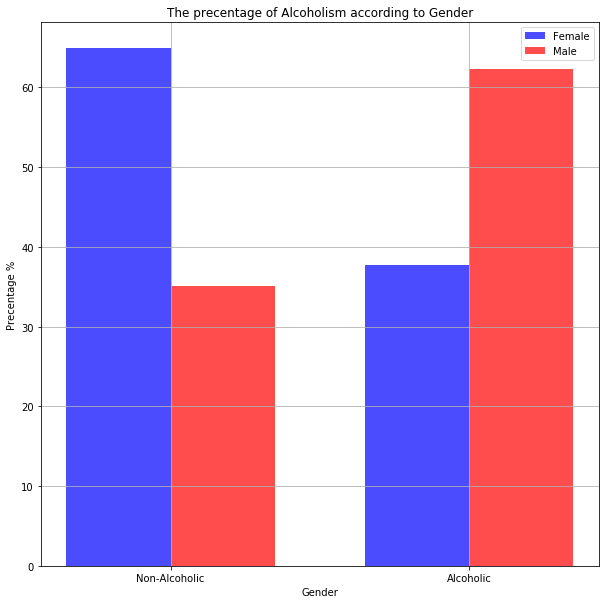

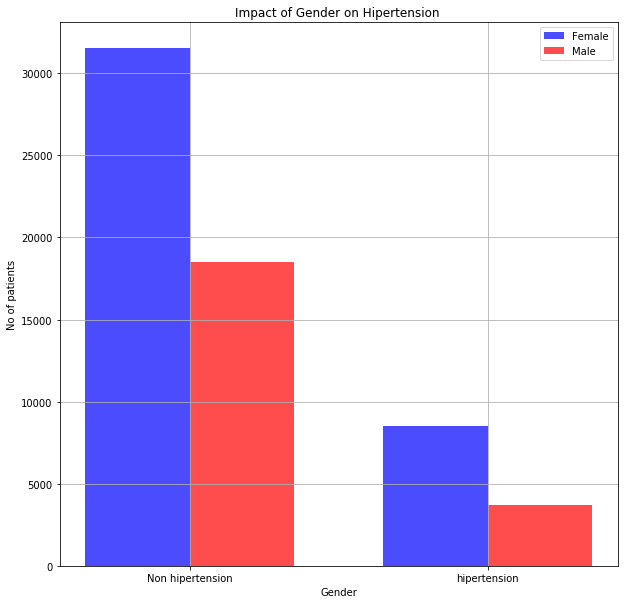

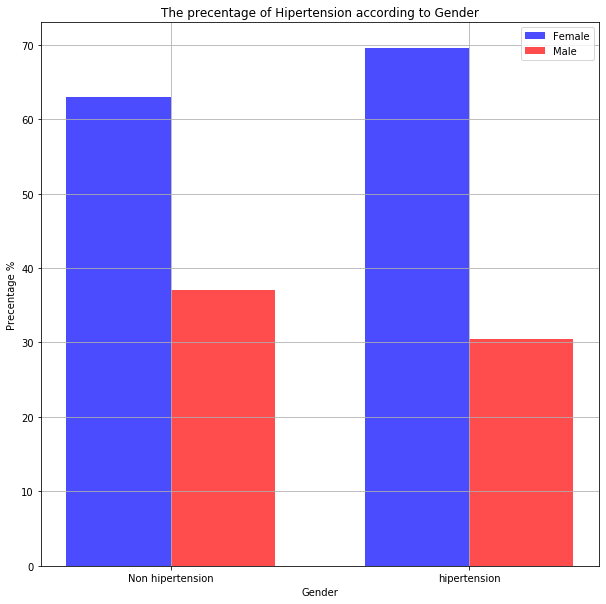

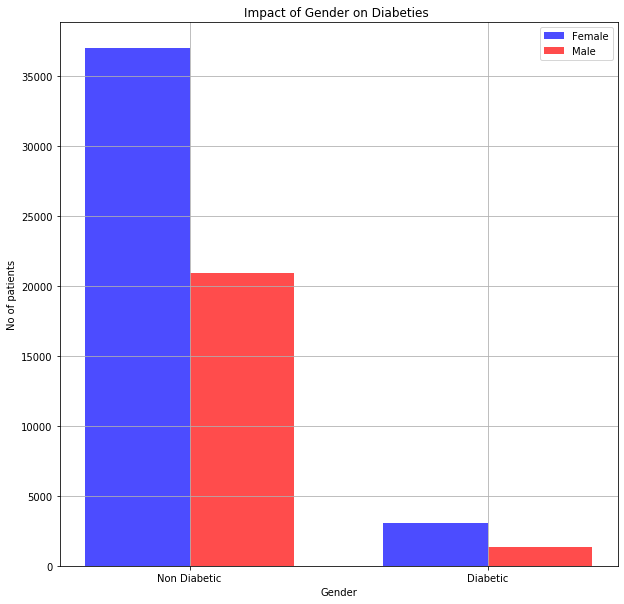

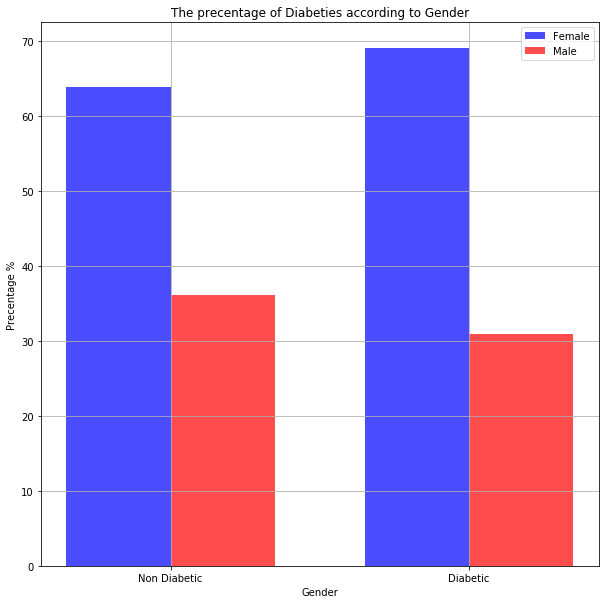

In [231]:
gender_alcoholism_list=[[gender_alcoholism[0],gender_alcoholism[2]],[gender_alcoholism[1],gender_alcoholism[3]]]
gender_hipertension_list=[[gender_hipertension[0],gender_hipertension[2]],[gender_hipertension[1],gender_hipertension[3]]]
gender_diabetes_list=[[gender_diabetes[0],gender_diabetes[2]],[gender_diabetes[1],gender_diabetes[3]]]
iterate_list=[gender_alcoholism_list,gender_hipertension_list,gender_diabetes_list]
label_list=[['Non-Alcoholic','Alcoholic'],['Non hipertension','hipertension'],['Non Diabetic','Diabetic']]
title_list=['Alcoholism','Hipertension','Diabeties']
# to speed the plotting cocatenating the lists together
for i in range(3):
    barat(iterate_list[i],label_list[i],'Gender',['Female','Male'],title_list[i])
    precentage_bar(iterate_list[i],label_list[i],'Gender',['Female','Male'],title_list[i])
                      

# Relation between age and diseases 

## [1]Diabetes

In [233]:
df_copy.groupby(['Age_cut','Diabetes'])['Diabetes'].count()

Age_cut    Diabetes
(0, 18]    0           15040
           1              23
(18, 30]   0            9253
           1              67
(30, 50]   0           15140
           1             735
(50, 70]   0           12537
           1            2437
(70, 115]  0            3878
           1            1154
Name: Diabetes, dtype: int64

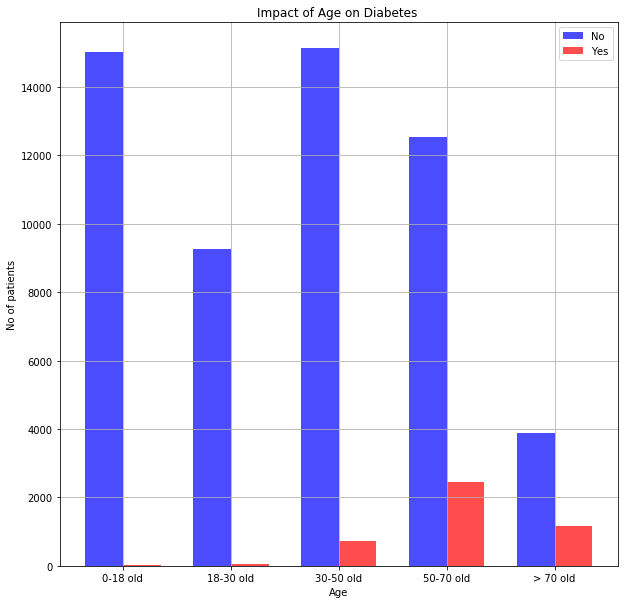

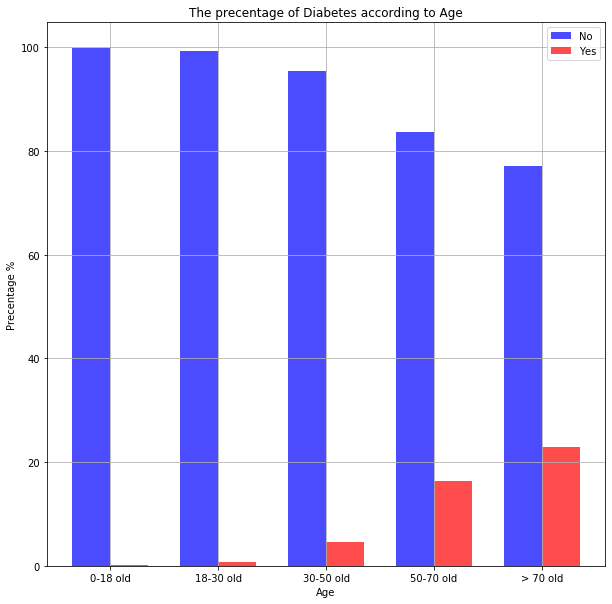

In [244]:
age_dia=list(df_copy.groupby(['Age_cut','Diabetes'])['Diabetes'].count())
age_list_dia=[[age_dia[i],age_dia[i+1]] for i in range(0,10,2) ]
barat(age_list_dia,bin_names,'Age',legend,'Diabetes')
precentage_bar(age_list_dia,bin_names,'Age',legend,'Diabetes')

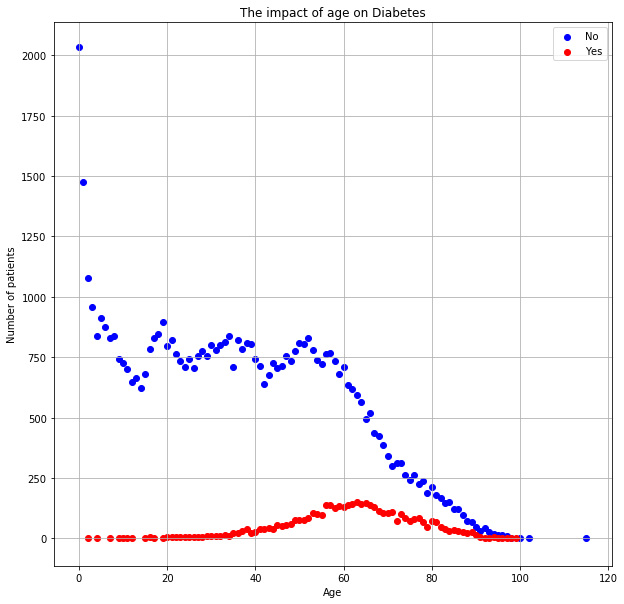

In [227]:
age3=dict(df_copy[df_copy['Diabetes']==0].groupby(['Age','Diabetes'])['Diabetes'].count())
age4=dict(df_copy[df_copy['Diabetes']==1].groupby(['Age','Diabetes'])['Diabetes'].count())
scatter_plot(age3,age4,'Diabetes')

## [2]Alcoholism

In [235]:
df_copy.groupby(['Age_cut','Alcoholism'])['Alcoholism'].count()

Age_cut    Alcoholism
(0, 18]    0             15050
           1                13
(18, 30]   0              9199
           1               121
(30, 50]   0             15244
           1               631
(50, 70]   0             14310
           1               664
(70, 115]  0              4955
           1                77
Name: Alcoholism, dtype: int64

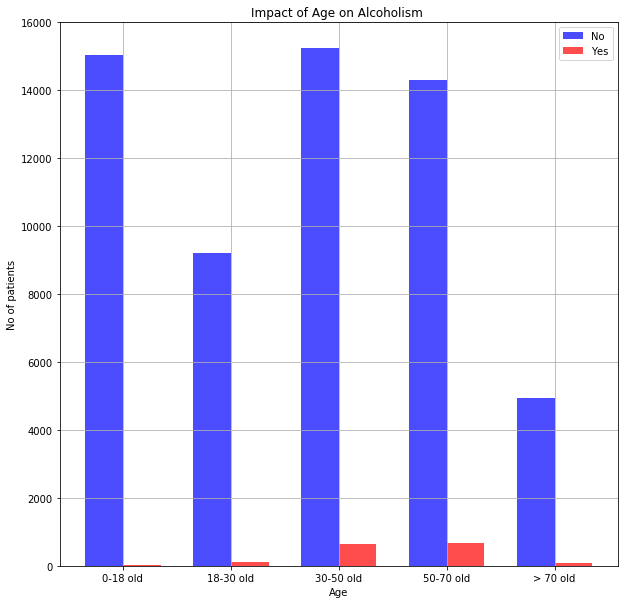

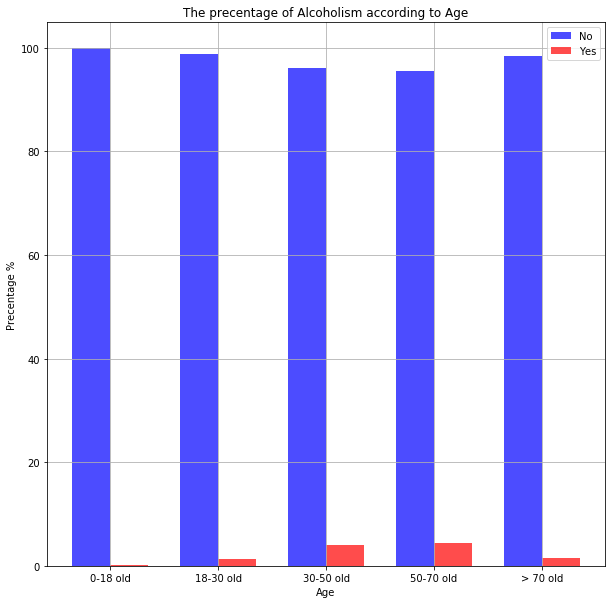

In [245]:
age_al=list(df_copy.groupby(['Age_cut','Alcoholism'])['Alcoholism'].count())
age_list_al=[[age_al[i],age_al[i+1]] for i in range(0,10,2) ]
barat(age_list_al,bin_names,'Age',legend,'Alcoholism')
precentage_bar(age_list_al,bin_names,'Age',legend,'Alcoholism')

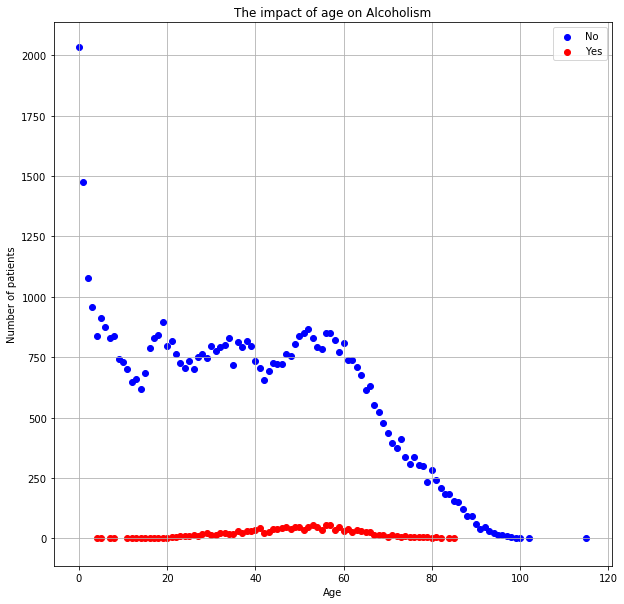

In [228]:
age5=dict(df_copy[df_copy['Alcoholism']==0].groupby(['Age','Alcoholism'])['Alcoholism'].count())
age6=dict(df_copy[df_copy['Alcoholism']==1].groupby(['Age','Alcoholism'])['Alcoholism'].count())
scatter_plot(age5,age6,'Alcoholism')

## [3]Hipertension

In [246]:
df_copy.groupby(['Age_cut','Hipertension'])['Hipertension'].count()

Age_cut    Hipertension
(0, 18]    0               15041
           1                  22
(18, 30]   0                9158
           1                 162
(30, 50]   0               13438
           1                2437
(50, 70]   0                8445
           1                6529
(70, 115]  0                1940
           1                3092
Name: Hipertension, dtype: int64

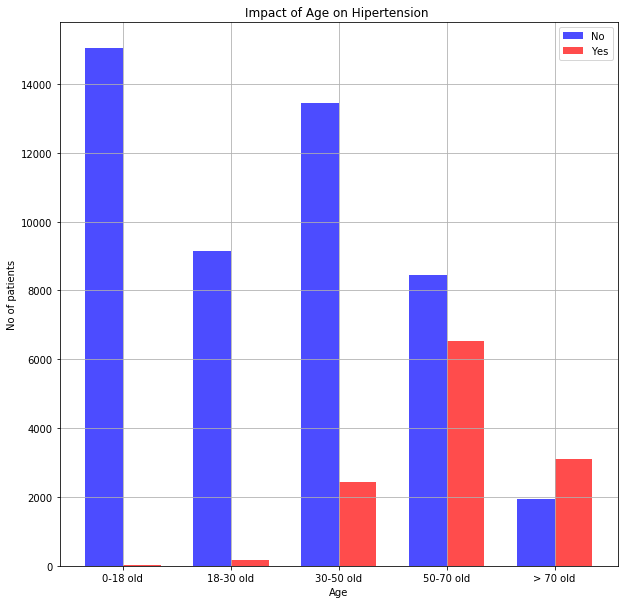

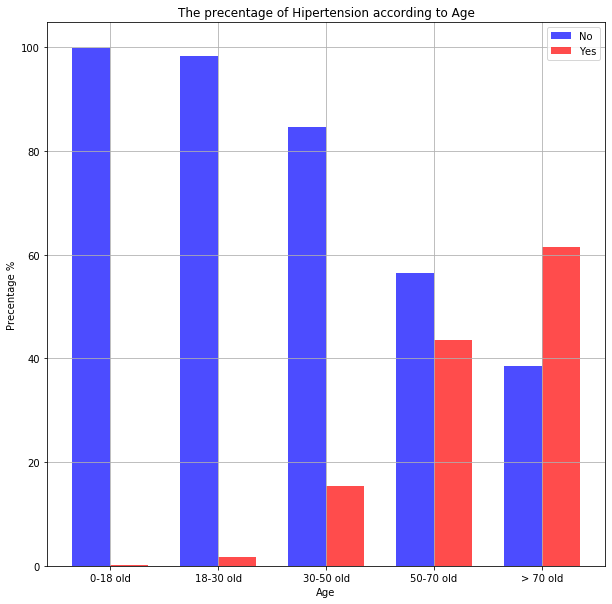

In [247]:
age_hi=list(df_copy.groupby(['Age_cut','Hipertension'])['Hipertension'].count())
age_list_hi=[[age_hi[i],age_hi[i+1]] for i in range(0,10,2) ]
barat(age_list_hi,bin_names,'Age',legend,'Hipertension')
precentage_bar(age_list_hi,bin_names,'Age',legend,'Hipertension')

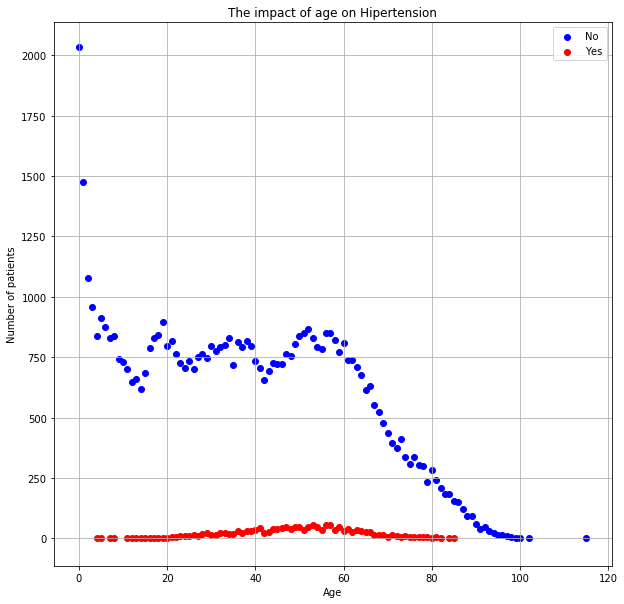

In [229]:
age7=dict(df_copy[df_copy['Hipertension']==0].groupby(['Age','Hipertension'])['Hipertension'].count())
age8=dict(df_copy[df_copy['Hipertension']==1].groupby(['Age','Hipertension'])['Hipertension'].count())
scatter_plot(age5,age6,'Hipertension')